# Class Imbalances
* [Class Imbalances](#classimbheader)
  - [Background](#Background)
  - [Measuring performance of classification problems](#Measuring-performance-of-classification-problems)
  - [Methods for handling class imbalance](#Methods-for-handling-class-imbalance)
    - [Under-sampling](#Under-sampling)
    - [Over-sampling](#Over-sampling)
    - [Hybrid](#Hybrid)
    - [Ensemble methods](#Ensemble-methods)
    - [Practical Rules](#Practical-Rules)
  - [Sample](#Sample)
  - [Conclusion](#Conclusion)
  - [References](#References)

# Class Imbalances<a name="classimbheader"></a>
## Background
A dataset is imbalanced if the number of samples for each class are not approximately equal.  Imbalanced data is common in many domains such as telecommunications, fraud detection, medical diagnosis, and text classification [1].  In 2006, 14 active researching contributing to IEEE ICDM and ACM KDD, listed dealing with unbalanced data as #10 of the top 10 challenging problems in data mining research[2]. In datasets with high class imbalance it can be easy to acheive high accuracy of predictions, by just using a simple rule of picking the majority class.  For example, in cancer detection a typical image might have 98% of the pixels normal and 2% of the pixels cancerous[1].  For this example predicting cancer correctly is more important than predicting normal, as the point of the screening is to detect if there is cancer.  The rest of this section will first present a mathematical basis for performance of classification problems and then present some of the typical ways of handling class imbalances, with special attention given to SMOTE and Borderline-SMOTE.

## Measuring performance of classification problems
For a binary classification problem measuring the performance of a learner starts with the confusion matrix.  An example of a confusion matrix is shown below: 

| -     |Predicted Negative|Predicted Positive|
|------|------------------|------------------|
|**Actual Negative**| TN | FP |
|**Actual Positive**| FN | TP |

From the confusion matrix we can define the following metrics:

| Metric | Formula | 
|------|-----------|
|Accuracy|$\frac{TP + TN}{TP + TN + FP + FN}$|
|Recall|$\frac{TP}{TP + FN}$|
|Precision |$\frac{TP}{TP + FP}$|
|Specificity |$\frac{TN}{TN + FP}$|
|F-value |$\frac{(1+\beta^2)*Recall*Precision}{\beta^2*Precision+Recall}$, $\beta$ is the relative imporatance of precision vs. recall and is usually 1|

For equal class problems simply looking at accuracy would be an easy metric to use for comparing different learners.  However, as we talked about earlier this does not work with imbalanced class problems.  One common way to compare different learners in classification problems is to use the Receiver Operating characteristic Curve (ROC) [3].  A ROC curve shows the false positive rate vs the true positive rate for various points generated by using different levels of a classification threshold. An example is shown below in the image.

![Roc Curve](roc-curves.png)

From the ROC curve another metric can be calcualted, that is the Area Under Curve (AUC).  The formula for AUC is  $\int_{-\inf}^{\inf} TPR(T)FPR'(T) dT$, where T is the threshold parameter.  An AUC of 0.5 means you might as well flip a coin, whereas an AUC of 1 is perfect.  There are some criticisms of AUC more recently, but its widely been used in ML research for awhile... so good enough for me.

## Methods for handling class imbalance
Now that I have sufficiently bored you lets talk about some of the standard method for handling class imbalances.  There are a few broad categories that most algorithms fall into.  Those are over-sampling, under-sampling, hybrid, and enbsemble methods. 

### Under-sampling
Under-sampling (or down-sampling) randomly removes samples from the majority class until a more balanced proportion is obtained [3].  If you want a simple technique that is pretty effective, then under-sampling is likely the best choice [1].  

### Over-sampling
Over-sampling (or up-sampling) randomly adds samples from the minority class.  In its most simple form over-sampling simply duplicates samples from the minority class.  This method leads to very focused decision regions[1], which can be a nightmare for generalization.  

One way to do smarter over-sampling is to add new simulated samples of the minority class, which is exactly what SMOTE does.  New samples are simulated by:

```
For each sample in minority class:
        find k neighbors in minority class
        randomly pick number (m) needed for increase %
        for each m neighbor:
         (sample - neighbor) * random.random() + sample
```
This causes the decision region to become more general [1].

Building on SMOTE, [3] introduced two variants of an algorithm called Borderline-SMOTE.  Borderline-SMOTE makes the observation that many machine learning algorithms focus on learning the decision boundary between classes.  Samples that are far from borderlines contribute little in these algorithms, so it makes sense to increase the number of samples at the borderline for the minority class.  Both variants of borderline-SMOTE roughly follow this algorithm:

```
For each sample in minority class:
        find k neighbors
        if there are more majority neigbors (but not all):
                for each m minority neighbor:
                    (sample - neighbor) * random.random() + sample
```

By following this approach the borderline is strengthened with simulated samples.  As can be seen in the following image:
![smote](borderlineSmote.png)

### Hybrid
Not a lot to say here, basically hybrid approaches combine both over-sampling and under-sampling.  Usually over-sampling is the focus, with under-sampling being used to reduce the amount of over-sampling needed.

### Ensemble methods
Danger! This is an area I have only just started reading into..  However I will give a small summary.  
Existing enseble methods do not handle class imbalances well, as there are many more samples in the majority class to focus error updates on.  However, there are some easy modifications that can be made to use ensbling methods.  Such as [5]:
1. Cost adjusted boosting (AdaBoost for the win!)
2. Preprocessing boosting, that is use SMOTE at each boosting round
3. Preprocessing bagging, (e.g. over-bagging, under-bagging)

### Practical Rules
1. When does a minority class matter? According to some recent research, about 10%[6]. This is highly dependent on how much performance matters, but in many cases there is less than 5% loss in AUC before this threshold.

2. Are there learning algorithms less affected by class imbalance? Yes, SVM seems to be significantly less affected [6].

3. How well do class imbalance methods recover loss of performance? A lot of methods are able to recover ~30% of performance loss caused by class imbalance [6].

4. Finally, the results of [6] showed that again random under-sampling is able to acheive surprisingly good results compared to much more complicated methods.  That is great news for us, as we are using over-sampling to deal with the imbalance of yes/no's in the HR application ranking project.

### Implementations of Class Imbalance Methods
For the most simple methods, like random over-sampling its relatively straight-forward to just implement it yourself.  However, for the more complicated class imbalance methods doing so can be fraught with error or a time sync.  

In R the caret pacakge includes under-sampling and down-sampling, which can be used before training or as part of it [7]. Also, in the R world the DmWR package includes an implementation of SMOTE, whereas the ROSE package provides a smoothed-bootstrap approach. Much more details can be found about ROSE in [8], however I haven't read it yet.

In the Python world there is imbalanced-learn, which provides a whole suite of class imbalance methods from under-sampling, over-sampling, hybrid, and ensemble [9].  In fact reading about the package on JMLR is the reason I ended up going down the rabbithole of handling class imbalances.  

## Sample
You made it this far, so I figured you should have a small sample...
In this sample we are looking at cancer data, where the target variable was whether a patient ended up needing a biopsy.  The data was obtained from UCI, see [10].  In this sample  I am trying just base samplers in each case of random under-sampling, random over-sampling, SMOTE, and borderline-SMOTE applied to the training data before applying a basic 3NN classifier.  The ROC curves are plotted for each case.  Additionally, a ROC curve is plotted for 3NN without a sampling method and one for luck.

In [93]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
cancer_data = pd.read_csv('risk_factors_cervical_cancer.csv', na_values=['?'])
print(cancer_data.shape)
cancer_data.interpolate(inplace=True)
cancer_data.dropna(inplace=True, axis='columns')

(858, 36)


In [94]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
RANDOM_STATE=42
LW = 2

def run_example(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    classifier = ['3NN', neighbors.KNeighborsClassifier(3)]

    samplers = [
        ['Random Under-Sampler', RandomUnderSampler(random_state=RANDOM_STATE)],
        ['Random Over-Sampler', RandomOverSampler(random_state=RANDOM_STATE)],
        ['SMOTE', SMOTE(random_state=RANDOM_STATE)],
        ['BSMOTE', BorderlineSMOTE(random_state=RANDOM_STATE)]
    ]

    pipelines = [
        ['{}-{}'.format(sampler[0], classifier[0]),
         make_pipeline(sampler[1], classifier[1])]
        for sampler in samplers
    ]
    pipelines.append([classifier[0],make_pipeline(classifier[1])])

    results = []
    for name, pipeline in pipelines:   
        clf = pipeline.fit(X_train, y_train)
        probas_ = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        
        roc_auc = auc(fpr, tpr)
        results.append([name, fpr, tpr, roc_auc])
    plot_roc(results)
    
        #plot_decision_function(X, y, clf)
    
def plot_roc(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k',label='Luck')
    ax.spines['top'].set_visible(False)
    for result in results:
        name, fpr, tpr, roc_auc = result
        plt.plot(fpr, tpr, linestyle='--',label='{} (AUC = %0.2f)'.format(name) % roc_auc, lw=LW)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Minority class percent: 0.0641025641025641


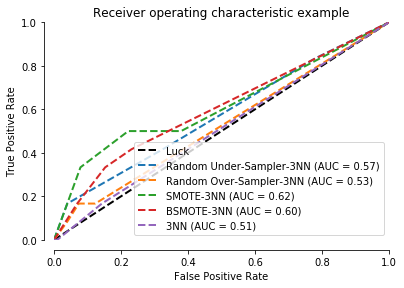

In [95]:
cancer_X = cancer_data.iloc[:, 1:-4]
cancer_y = cancer_data.iloc[:, -1]
counts = cancer_y.value_counts()
print("Minority class percent:", counts[1]/cancer_y.shape[0])
run_example(cancer_X, cancer_y)

## Conclusion
As this notebook wentover there are many different ways of handling class imbalances in your data.  In general if your minority class is <10%, it makes a big difference to use a class imbalance method to improve performance.  From my very simple and silly example SMOTE and Borderline-SMOTE were able to acheive the best results.  However, there was no tuning done to try to get a better model.  

## References
1. Nitesh V. Chawla, Kevin W. Bowyer, Lawrence O. Hall, W. Philip Kegelmeyer: SMOTE: Synthetic Minority Over-Sampling Technique. Journal of Artificial Intelligence Reseach 16 (2002) 321-357. https://arxiv.org/pdf/1106.1813.pdf
2. Qiang Yang, Xindong Wu: 10 Challenging Problems in Data Mining Research.  International Journal of Information Technology & Decision Making, 5(04): 597-604, 2006. http://www.cs.uvm.edu/~icdm/10Problems/10Problems-06.pdf
3. Hui Han, Wen-Yuan Wang, Bing-Huan Mao: Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning. Advances in Intelligent Computing, International Conference on Intelligent Computing (2005). https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf
4. Receiver operating characteristic. https://en.wikipedia.org/wiki/Receiver_operating_characteristic
5. Mikel Galar, Alberto Fernandez, Edurne Barrenechea, Humberto Bustince, and Francisco Herrera: A Review on Ensembles for the Class Imbalance Problem: Bagging-, Boosting-, and Hybrid-Based Approaches. IEEE TRANSACTIONS ON SYSTEMS, MAN, AND CYBERNETICS. https://sci2s.ugr.es/keel/pdf/algorithm/articulo/2011-IEEE%20TSMC%20partC-%20GalarFdezBarrenecheaBustinceHerrera.pdf
6. Ronaldo C. Prati, Gustavo E. A. P. A. Batista, Diego F. Silva: Class Imbalance Revisited: a New Experimental Setup to Asses the Performance of Treatment Methods. https://www.researchgate.net/publication/267269631_Class_imbalance_revisited_A_new_experimental_setup_to_assess_the_performance_of_treatment_methods
7. Max Kuhn: Subsampling for class imbalances, The caret Package. https://topepo.github.io/caret/subsampling-for-class-imbalances.html
8. Nicola Lunardon, Giovanna Menardi, and Nicola Torelli: ROSE: A Package for Binary Imbalanced Learning. The R Journal Vol. 6/1, June 2014. https://journal.r-project.org/archive/2014/RJ-2014-008/RJ-2014-008.pdf
9. Guillaume Lemaitre, Fernando Nogueira, Christos K. Aridas: Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning. Journal of Machine Learning Research 18 (2017) 1-5. http://www.jmlr.org/papers/volume18/16-365/16-365.pdf
10. Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017. https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#